In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [2]:
"""
    Cell purpose : Loading confusion matrix of each model and calculating precision and recall
"""
def calc_precision_recall(confusion_matrix):
    """
        this function calculates and returns the precision and recall of the given confusion matrix
        
        args: confusion matrix
        return: precision, recall
    """
    true_pos = np.diag(confusion_matrix)
    false_pos = np.sum(confusion_matrix, axis=0) - true_pos
    false_neg = np.sum(confusion_matrix, axis=1) - true_pos
    
    precision = np.sum(np.nan_to_num(true_pos / (true_pos + false_pos))) / 120
    recall = np.sum(np.nan_to_num(true_pos / (true_pos + false_neg))) / 120
    
    return precision, recall

cm_cnn = np.loadtxt("../../Subset_notebooks/CNN/subset_cnn_confusion.txt", dtype=float)
cm_kmeans_cnn = np.loadtxt("../../Subset_notebooks/K_Means/subset_kmeans_cnn_confusion.txt", dtype=float)
cm_kmeans_sift = np.loadtxt("../../Subset_notebooks/K_Means/subset_kmeans_sift_confusion.txt", dtype=float)
cm_svm_cnn = np.loadtxt("../../Subset_notebooks/SVM/subset_svm_cnn_confusion.txt", dtype=float)
cm_svm_sift = np.loadtxt("../../Subset_notebooks/SVM/subset_svm_sift_confusion.txt", dtype=float)

cnn_precision, cnn_recall = calc_precision_recall(cm_cnn)
kmeans_cnn_precision, kmeans_cnn_recall = calc_precision_recall(cm_kmeans_cnn)
kmeans_sift_precision, kmeans_sift_recall = calc_precision_recall(cm_kmeans_sift)
svm_cnn_precision, svm_cnn_recall = calc_precision_recall(cm_svm_cnn)
svm_sift_precision, svm_sift_recall = calc_precision_recall(cm_svm_sift)

C:\Users\ashka\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


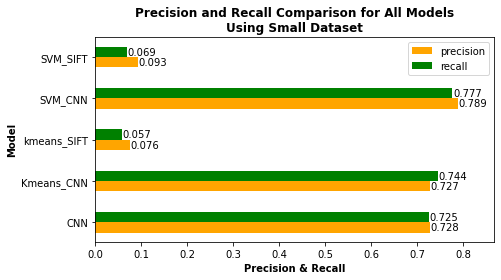

In [9]:
"""
    Cell purpose : Plotting a barh graph for precision and recall of each model in Largesubset
"""
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        width = rect.get_width()
        ax.annotate('{:.3f}'.format(width),
                    xy=(rect.get_x() + width, rect.get_y()),
                    xytext=(15, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ylabels = ['CNN', 'Kmeans_CNN', 'kmeans_SIFT', 'SVM_CNN', 'SVM_SIFT']
precisions = [cnn_precision, kmeans_cnn_precision, kmeans_sift_precision, svm_cnn_precision, svm_sift_precision]
recalls = [cnn_recall, kmeans_cnn_recall, kmeans_sift_recall, svm_cnn_recall, svm_sift_recall]

y = np.arange(len(ylabels))  # the label locations
width = 0.25  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.barh(y - (width/2), precisions, width, label='precision', color='orange')
rects2 = ax.barh(y + (width/2), recalls, width, label='recall', color='g')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model', fontweight='bold')
ax.set_xlabel('Precision & Recall', fontweight='bold')
ax.set_title('Precision and Recall Comparison for All Models\nUsing Small Dataset', fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(ylabels)
ax.legend()

# changing the graph size
N = 30
plt.gca().margins(x=0.1)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
# changing the graph size

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.savefig('./' + 'smallset_precision_and_recall' + '.jpg')

plt.show()